# Predicting Exercise-induced Angina

## DSCI 100 Group 05 Project - Heart Disease
## Introduction

### Heart disease describes a range of conditions that affect the heart.


## Loading in libraries and the data set


First, we downloaded the dataset through a relative path (data/cleve.mod). Since the data values are separated by tabs, we used `read_delim()` to read the dataset into a single data frame called `cleveland_data`. 

We found that the Heart Disease dataset contains 19 lines of metadata, so we use `skip=19` to obtain the relevant information. 
Then, we set the column names according to the dataset information.

Initially, all column sarr o otype `character`, when they should be `numerc . `oe, we converted those to the correct ypye by  uing “as.nmueric`"



In [13]:
## Load libraries:
library(tidyverse)
library(readr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

# Set seed
set.seed(1)

## Load Heart Disease Data (name the object heart_disease)
heart_disease_data <- read_delim("data/cleve.mod", delim = "\t", skip = 19, col_names = FALSE)


Rows: 303 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Cleaning and wrangling data

In [14]:
## Clean and wrangle data 

heart_disease_clean <- heart_disease_data |> 
    separate(X1, into = c("age", "sex", "cp", "trestbps", "chol","fbs", 
                   "restecg", "thalach", "exang", "oldpeak", "slope", 
                   "ca", "thal", "num"), sep = "\\s+")

## Set columns to correct type
heart_disease_clean <- mutate_at(heart_disease_clean, 
                             c("age", "trestbps", "chol", "thalach", "oldpeak", "ca", "num"),
                            as.numeric) |>
    mutate(exang = as_factor(exang)) |>
    select(exang, age, trestbps, chol, thalach)

heart_disease_clean

## Scaling the data
heart_disease_scaled <- heart_disease_clean |>
    mutate(scaled_age = scale(age, center = TRUE),
          scaled_trestbps = scale(trestbps, center = TRUE),
          scaled_chol = scale(chol, center = TRUE),
          scaled_thalach = scale(thalach, center = TRUE))

## Splitting the data into training and testing

heart_disease_split <- initial_split(heart_disease_clean, prop = 0.75, strata = exang)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

    


Warning message:
“Expected 14 pieces. Additional pieces discarded in 303 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = .Primitive("as.double")(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


exang,age,trestbps,chol,thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
fal,63,145,233,150
true,67,160,286,108
true,67,120,229,129
⋮,⋮,⋮,⋮,⋮
fal,49,118,149,126
true,74,120,269,121
fal,54,160,201,163


In [15]:
## Group and Summarize Data to see number of occurences of different chest pain types

num_cp <- heart_disease_train |>
    group_by(exang) |>
    summarize(count = n(),
             avg_restbps = mean(trestbps), ## resting blood pressure
             avg_age = mean(age),         ## age
             avg_chol = mean(chol),       ## serum cholesterol
             avg_thalach = mean(thalach)) ## max heart rate

num_cp

exang,count,avg_restbps,avg_age,avg_chol,avg_thalach
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
fal,153,130.5294,53.66013,242.1373,156.3203
true,74,133.8514,55.72973,248.5135,136.6081


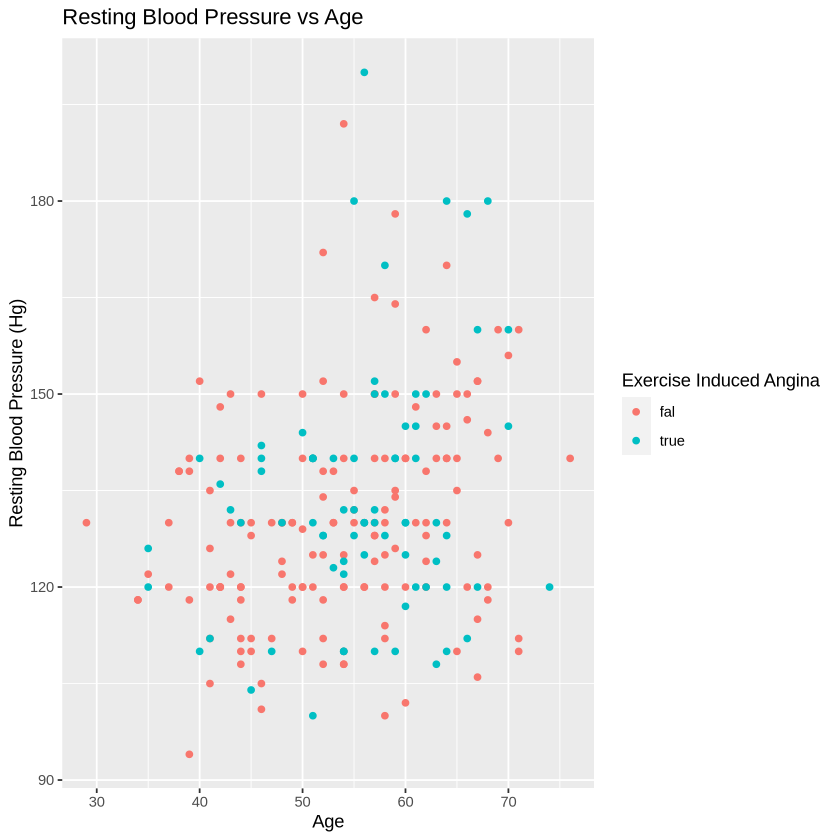

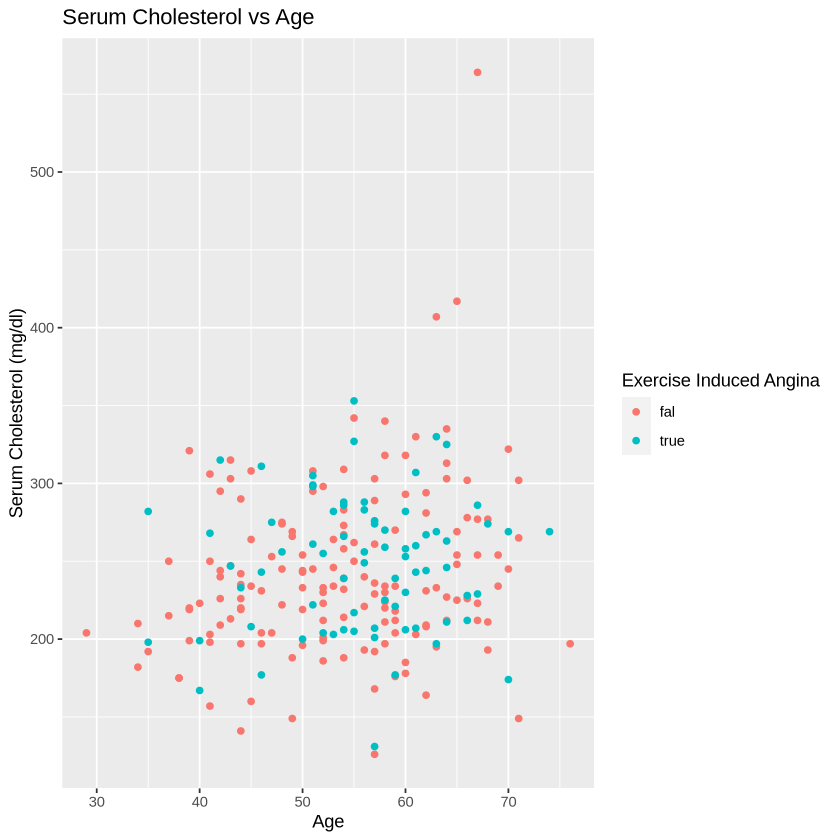

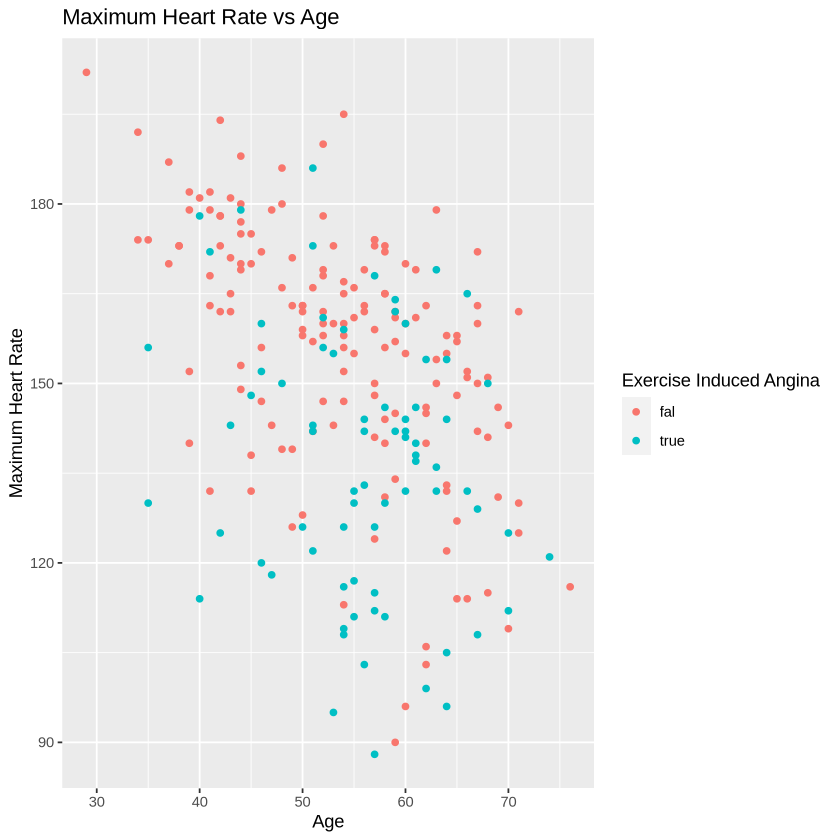

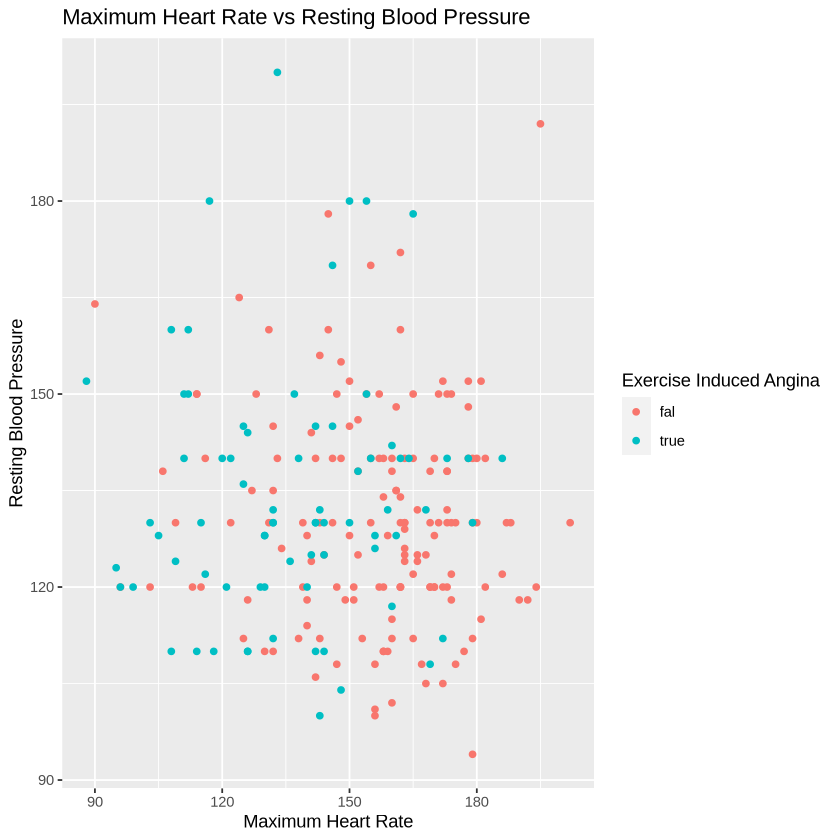

In [16]:
## Create plots to visualize data

## Resting Blood Pressure vs Age
bp_age_plot <- heart_disease_train |>
    ggplot(aes(x = age, y = trestbps, color = exang)) +
    geom_point() +
    labs(x= "Age", y = "Resting Blood Pressure (Hg)", 
         title = "Resting Blood Pressure vs Age",
        color = "Exercise Induced Angina")
bp_age_plot

## Serum Cholesterol vs Age
chol_age_plot <- heart_disease_train |>
    ggplot(aes(x = age, y = chol, color = exang)) +
    geom_point() +
    labs(x= "Age", y = "Serum Cholesterol (mg/dl)", 
         title = "Serum Cholesterol vs Age",
        color = "Exercise Induced Angina")
chol_age_plot

## Max Heart rate vs Age
thalach_age_plot <- heart_disease_train |>
    ggplot(aes(x = age, y = thalach, color = exang)) +
    geom_point() +
    labs(x= "Age", y = "Maximum Heart Rate", 
         title = "Maximum Heart Rate vs Age",
        color = "Exercise Induced Angina")
thalach_age_plot

## Resting Blood Pressure vs Heart Rate

bp_thalach_plot <- heart_disease_train |>
    ggplot(aes(x = thalach, y = trestbps, color = exang)) +
    geom_point() +
    labs(x= "Maximum Heart Rate", y = "Resting Blood Pressure", 
         title = "Maximum Heart Rate vs Resting Blood Pressure",
        color = "Exercise Induced Angina")
bp_thalach_plot
